In [1]:
import os
import torch
import pandas as pd
import numpy as np
import pytorch_lightning as pl
from pytorch_lightning.callbacks import ModelCheckpoint
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from torch.utils.data import DataLoader
from modules.lifter_2d_3d.dataset.drive_and_act_keypoint_dataset import DriveAndActKeypointDataset
from modules.lifter_2d_3d.model.linear_model.lit_linear_model import LitSimpleBaselineLinear
from modules.utils.visualization import (
    plot_samples
)
from IPython.display import display
from pathlib import Path

pl.seed_everything(1234)

# ------------
# dataset path
# ------------
dataset_root_path = Path('/root/data/processed/drive_and_act/')
keypoint_2d_path = dataset_root_path / 'keypoint_detection_results'
keypoint_3d_path = dataset_root_path / 'annotations'
# ------------
# model
# ------------
image_width = 1280
image_height = 1024
batch_size = 64
max_epoch = 200
val_check_period = 5
early_stopping_patience = 5
lit_model = LitSimpleBaselineLinear(exclude_ankle=True, exclude_hip=True)
# ------------
# saved model path
# ------------
saved_model_path = './saved_lifter_2d_3d_model/drive_and_act/prediction/linear_model'


train_dataset = DriveAndActKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_train.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_train.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    actors=['vp1', 'vp2', 'vp3', 'vp4', 'vp5', 'vp6', 'vp7', 'vp8', 'vp9', 'vp10'],
    exclude_ankle=True,
    exclude_hip=True
)
val_dataset = DriveAndActKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_val.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_val.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    actors=['vp11', 'vp12'],
    exclude_ankle=True,
    exclude_hip=True
)
test_dataset = DriveAndActKeypointDataset(
    prediction_file=(keypoint_2d_path / 'keypoint_detection_test.json').as_posix(),
    annotation_file=(keypoint_3d_path / 'person_keypoints_test.json').as_posix(),
    image_width=image_width,
    image_height=image_height,
    actors=['vp13', 'vp14', 'vp15'],
    exclude_ankle=True,
    exclude_hip=True
)

print(
    'train_dataset', len(train_dataset),
    'val_dataset', len(val_dataset),
    'test_dataset', len(test_dataset)
)
train_loader = DataLoader(train_dataset, batch_size=batch_size, drop_last=True, shuffle=True, num_workers=24)
val_loader = DataLoader(val_dataset, batch_size=batch_size, drop_last=True, num_workers=24)
test_loader = DataLoader(test_dataset, batch_size=batch_size, num_workers=24)


model_checkpoint = ModelCheckpoint(monitor='val_loss',mode='min', save_top_k=1)
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=early_stopping_patience)

if not os.path.exists(saved_model_path):
    os.makedirs(saved_model_path)

device = 'cuda' if torch.cuda.is_available() else 'cpu'
trainer = pl.Trainer(
    # max_steps=10,
    max_epochs=max_epoch,
    callbacks=[model_checkpoint, early_stopping],
    accelerator=device,
    check_val_every_n_epoch=val_check_period,
    default_root_dir=saved_model_path,
    gradient_clip_val=1.0
)
trainer.fit(lit_model, train_loader, val_loader)

Global seed set to 1234


skipping problematic image 15783
skipping problematic image 17258
skipping problematic image 17259
skipping problematic image 21271
skipping problematic image 21272
skipping problematic image 21273
skipping problematic image 21274
skipping problematic image 21275
skipping problematic image 21276
skipping problematic image 33527


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


train_dataset 26626 val_dataset 5103 test_dataset 8414


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type          | Params
----------------------------------------
0 | model | BaselineModel | 4.3 M 
----------------------------------------
4.3 M     Trainable params
0         Non-trainable params
4.3 M     Total params
17.105    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

check #0
val MPJPE from: 128 samples : 2893.4974670410156


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

check #1
training loss from 2080 batches: 500.90740858577186
val MPJPE from: 5056 samples : 81.75816386938095


Validation: 0it [00:00, ?it/s]

check #2
training loss from 2080 batches: 105.92415710338034
val MPJPE from: 5056 samples : 65.79479575157166


Validation: 0it [00:00, ?it/s]

check #3
training loss from 2080 batches: 89.79802378811515
val MPJPE from: 5056 samples : 63.843995332717896


Validation: 0it [00:00, ?it/s]

check #4
training loss from 2080 batches: 82.41014962371152
val MPJPE from: 5056 samples : 61.75178661942482


Validation: 0it [00:00, ?it/s]

check #5
training loss from 2080 batches: 78.28743477495244
val MPJPE from: 5056 samples : 59.86277014017105


Validation: 0it [00:00, ?it/s]

check #6
training loss from 2080 batches: 76.10678316738743
val MPJPE from: 5056 samples : 59.54344570636749


Validation: 0it [00:00, ?it/s]

check #7
training loss from 2080 batches: 74.15700989166419
val MPJPE from: 5056 samples : 60.52174046635628


Validation: 0it [00:00, ?it/s]

check #8
training loss from 2080 batches: 72.74667400902567
val MPJPE from: 5056 samples : 59.597160667181015


Validation: 0it [00:00, ?it/s]

check #9
training loss from 2080 batches: 71.80109730599304
val MPJPE from: 5056 samples : 58.90529975295067


Validation: 0it [00:00, ?it/s]

check #10
training loss from 2080 batches: 70.88604060610614
val MPJPE from: 5056 samples : 58.84222313761711


Validation: 0it [00:00, ?it/s]

check #11
training loss from 2080 batches: 70.30966008583513
val MPJPE from: 5056 samples : 58.93859267234802


Validation: 0it [00:00, ?it/s]

check #12
training loss from 2080 batches: 69.81333080643358
val MPJPE from: 5056 samples : 57.72996321320534


Validation: 0it [00:00, ?it/s]

check #13
training loss from 2080 batches: 69.2704420321836
val MPJPE from: 5056 samples : 58.26382711529732


Validation: 0it [00:00, ?it/s]

check #14
training loss from 2080 batches: 69.00102517639216
val MPJPE from: 5056 samples : 57.78791755437851


Validation: 0it [00:00, ?it/s]

check #15
training loss from 2080 batches: 68.8120339370261
val MPJPE from: 5056 samples : 58.24679508805275


Validation: 0it [00:00, ?it/s]

check #16
training loss from 2080 batches: 68.52813562414107
val MPJPE from: 5056 samples : 58.04189294576645


Validation: 0it [00:00, ?it/s]

check #17
training loss from 2080 batches: 68.31116414664743
val MPJPE from: 5056 samples : 57.54296854138374


Validation: 0it [00:00, ?it/s]

check #18
training loss from 2080 batches: 68.21898631930638
val MPJPE from: 5056 samples : 58.23555588722229


Validation: 0it [00:00, ?it/s]

check #19
training loss from 2080 batches: 68.17393670431697
val MPJPE from: 5056 samples : 57.79038369655609


Validation: 0it [00:00, ?it/s]

check #20
training loss from 2080 batches: 67.92711058559898
val MPJPE from: 5056 samples : 57.595301419496536


Validation: 0it [00:00, ?it/s]

check #21
training loss from 2080 batches: 67.87998196848024
val MPJPE from: 5056 samples : 58.30973759293556


Validation: 0it [00:00, ?it/s]

check #22
training loss from 2080 batches: 67.67373973181327
val MPJPE from: 5056 samples : 58.0856055021286


In [2]:
with open(f'{saved_model_path}/best_model_path.txt', 'w') as f:
    f.writelines(model_checkpoint.best_model_path)
best_checkpoint_path = model_checkpoint.best_model_path
trainer.test(ckpt_path=best_checkpoint_path, dataloaders=test_loader)

Restoring states from the checkpoint path at saved_lifter_2d_3d_model/drive_and_act/prediction/linear_model/lightning_logs/version_1/checkpoints/epoch=84-step=35360.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
Loaded model weights from the checkpoint at saved_lifter_2d_3d_model/drive_and_act/prediction/linear_model/lightning_logs/version_1/checkpoints/epoch=84-step=35360.ckpt


Testing: 0it [00:00, ?it/s]

MPJPE: 62.87377120590697
PJPE
                      PJPE
nose             53.279497
left_eye         43.921767
right_eye        46.710594
left_ear         11.242466
right_ear        44.010396
left_shoulder    50.950572
right_shoulder   43.016222
left_elbow       67.770729
right_elbow      67.517573
left_wrist       81.833558
right_wrist     103.548190
left_hip         41.866471
right_hip        37.234042
activities_mpjpe:
{}
test mpjpe: 62.87377120590697


/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           mpjpe           │     62.87377120590697     │
└───────────────────────────┴───────────────────────────┘

[{'mpjpe': 62.87377120590697}]

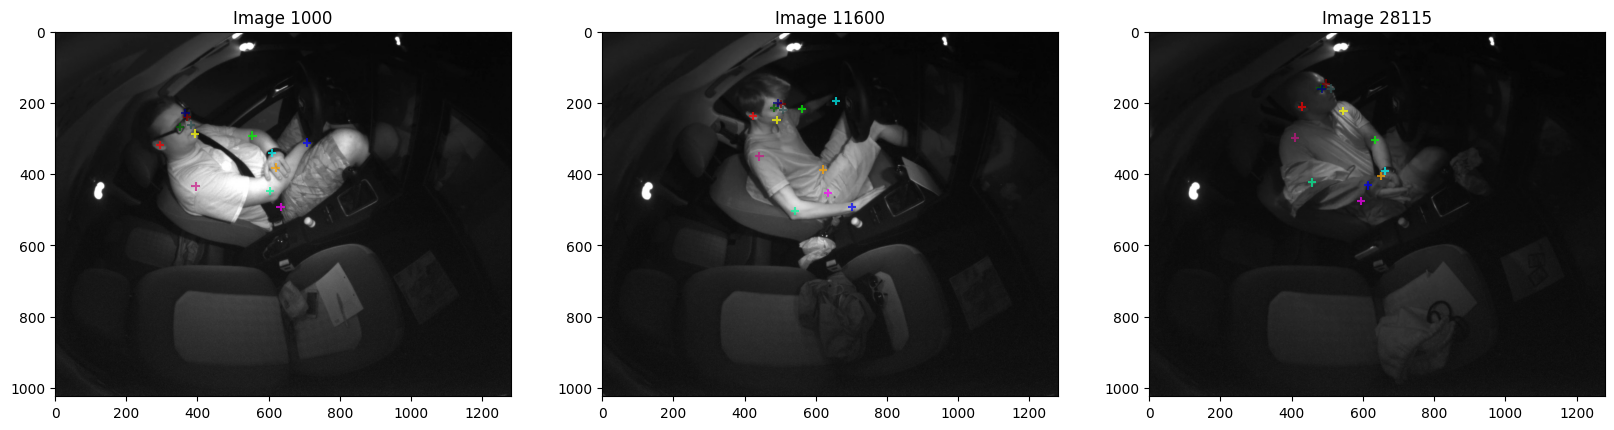

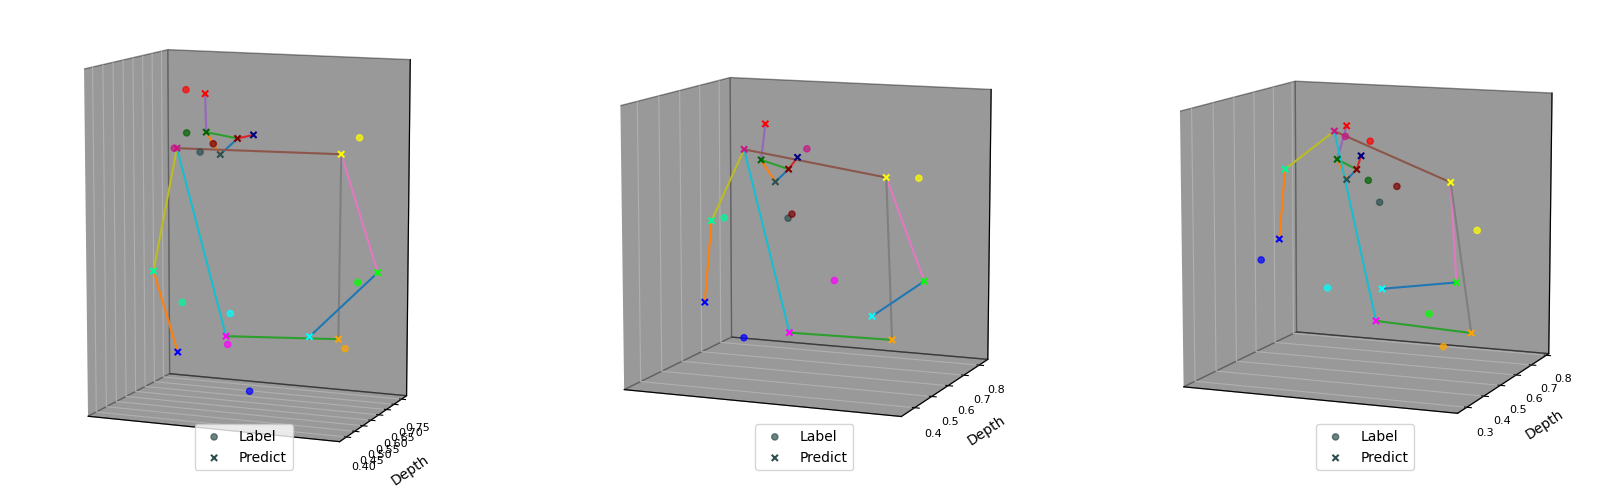

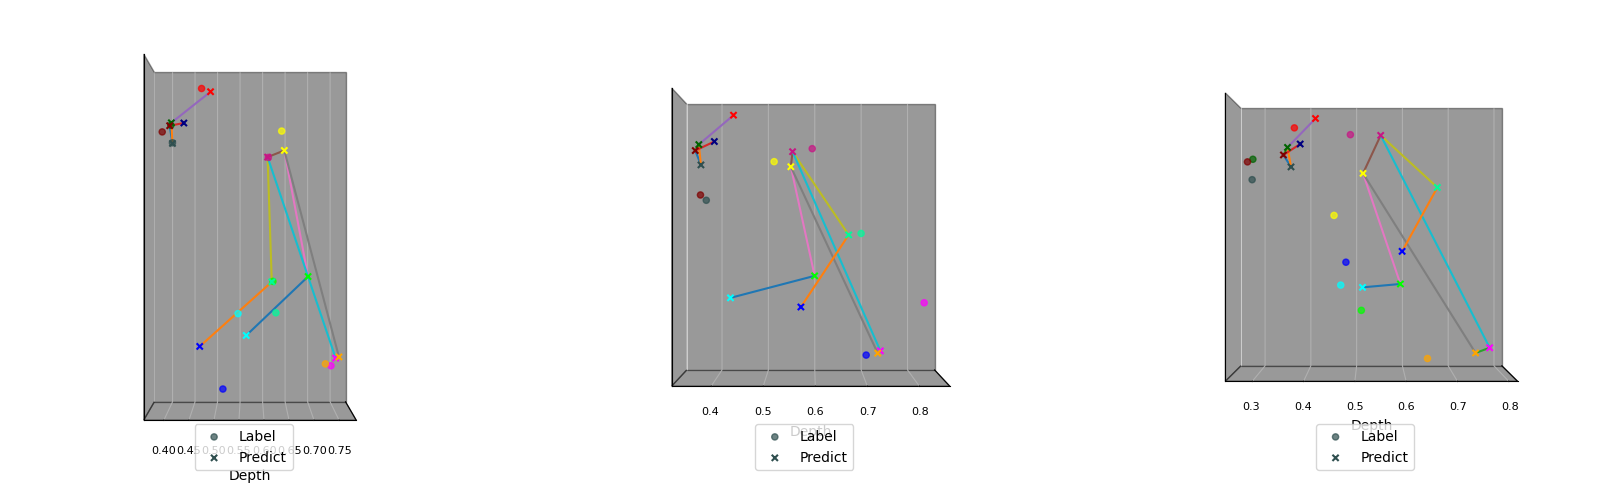

In [4]:
plot_samples(
    dataset_root_path,
    trainer.model,
    test_loader,
    'test',
    img_figsize=(20, 10),
    img_width=image_width,
    img_height=image_height,
    plot_figsize=(20.5, 10),
    sample_idices=[1000, 2500, 6000],
    is_plot_gt_skeleton=False
)